In [1]:
import numpy
import pickle
import matplotlib.pyplot as plt
import numpy
from   matplotlib.pylab import *
import quicklens as ql

IMPORT ERROR: /Users/antonbaleatolizancos/opt/anaconda3/envs/lensing_py2/lib/python2.7/site-packages/quicklens/mpi.pyc (No module named pypar). Could not load pbs or pypar. MPI will not be used.


Some settings for plotting

In [2]:
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3,3))
fig_width_pt = 246.0*1.4  # Get this from LaTeX using \the\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch

golden_mean = (numpy.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean*1.4      # height in inches
fig_size =  [fig_width,fig_height]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'axes.labelsize': 11,
          'font.size':  11,
          'legend.fontsize': 11,
          'xtick.labelsize': 8.5,
          'ytick.labelsize': 8.5,
          'figure.figsize': fig_size,
          'font.family':'serif'}
plt.rcParams.update(params)

Load in the the spectra provided by Byeonghee

In [3]:
# LSST auto
ell = np.arange(8,2007+1)
clgg_matrix = np.loadtxt("correlated_tracers/clgg_LSSTgold_6tomobins.dat") # dimension = (6,2000) = (gg bin, ell bin)
clgg_bin1 = clgg_matrix[0,:]; clgg_bin2 = clgg_matrix[1,:]; clgg_bin3 = clgg_matrix[2,:]; clgg_bin4 = clgg_matrix[3,:]; clgg_bin5 = clgg_matrix[4,:]; clgg_bin6 = clgg_matrix[5,:]

# LSST x kappa
clkg_matrix = np.loadtxt("correlated_tracers/clkg_LSSTgold_6tomobins.dat") # dimension = (6,2000) = (gg bin, ell bin)
clkg_bin1 = clkg_matrix[0,:]; clkg_bin2 = clkg_matrix[1,:]; clkg_bin3 = clkg_matrix[2,:]; clkg_bin4 = clkg_matrix[3,:]; clkg_bin5 = clkg_matrix[4,:]; clkg_bin6 = clkg_matrix[5,:]

# LSSTxCIB
clgCIB_matrix = np.loadtxt("correlated_tracers/cl_CIBxLSSTgold_6tomobins.dat") # dimension = (6,2000) = (gg bin, ell bin)
clgCIB_bin1 = clgCIB_matrix[0,:]; clgCIB_bin2 = clgCIB_matrix[1,:]; clgCIB_bin3 = clgCIB_matrix[2,:]; clgCIB_bin4 = clgCIB_matrix[3,:]; clgCIB_bin5 = clgCIB_matrix[4,:]; clgCIB_bin6 = clgCIB_matrix[5,:]

# LSST gold with single bin
# LSST augo
clgg = np.loadtxt("correlated_tracers/clgg_LSSTgold_singlebin.dat")
# LSST x kappa
clkg = np.loadtxt("correlated_tracers/clkg_LSSTgold_singlebin.dat")
# LSST x CIB
clgCIB = np.loadtxt("correlated_tracers/cl_CIBxLSSTgold_singlebin.dat")
# CIB auto
clII = np.loadtxt("correlated_tracers/cl_CIBauto.dat") # a vector of length 2000, ellmin = 8, ellmax = 2007
# CIB x kappa
clkI = np.loadtxt("correlated_tracers/cl_CIBxkappa.dat") # a vector of length 2000, ellmin = 8, ellmax = 2007
# Clkk
clkk = np.loadtxt("correlated_tracers/cl_kk.dat") # a vector of length 2000, ellmin = 8, ellmax = 2007

cl_len     = ql.spec.get_camb_lensedcl(lmax=3000)
cl_unl     = ql.spec.get_camb_scalcl(lmax=3000)

# Cast the spectra into longer, zero-padded arrays
def pad_cls(orig_cl):
    cl_padded = np.ones(cl_unl.ls.shape)
    cl_padded[8:2008] = orig_cl
    return cl_padded

filter_array = np.ones(cl_unl.ls.shape)
filter_array[:9] = 0
filter_array[2008:] = 0

clkk = pad_cls(clkk)

clII = pad_cls(clII)
clgg = pad_cls(clgg)
clIg = pad_cls(clgCIB)

clkI = pad_cls(clkI)
clkg = pad_cls(clkg)
clIg = pad_cls(clgCIB)

# Load in SO reconstruction noise
sensNow = '2'
depNow = '0'
Nls = np.loadtxt('correlated_tracers/SO_nlkk_plot/Apr17_mv_nlkk_deproj'+depNow+'_SENS'+sensNow+'_fsky_'+'16000'+'_iterOn.csv')

nlkk = np.interp(cl_unl.ls, Nls[:,0], Nls[:,1])
clkkrec = clkk + nlkk

Visualise spectra --- Note that CIB is in MJy/sr

Text(0,0.5,'$C_l$')

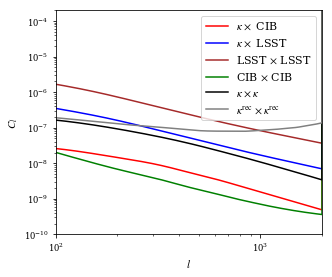

In [4]:
plt.loglog(cl_unl.ls, clkI, label=r'$\kappa\, \times $ CIB', color='r')
plt.loglog(cl_unl.ls, clkg, label=r'$\kappa\, \times $ LSST', color='b')

plt.loglog(cl_unl.ls, clgg, label=r'LSST $ \times $ LSST', color='brown')
plt.loglog(cl_unl.ls, clII, label=r'CIB $ \times $ CIB', color='g')
plt.loglog(cl_unl.ls, clkk, label=r'$\kappa\, \times \kappa$', color='k')
plt.loglog(cl_unl.ls, clkkrec, label=r'$\kappa^{\mathrm{rec}}\, \times \kappa^{\mathrm{rec}}$', color='gray')

plt.legend()
plt.xlim([100,2000])
plt.ylim([1e-10,2e-4])
plt.xlabel(r'$l$')
plt.ylabel(r'$C_l$')

Compare with the plot from Byeonghee's paper

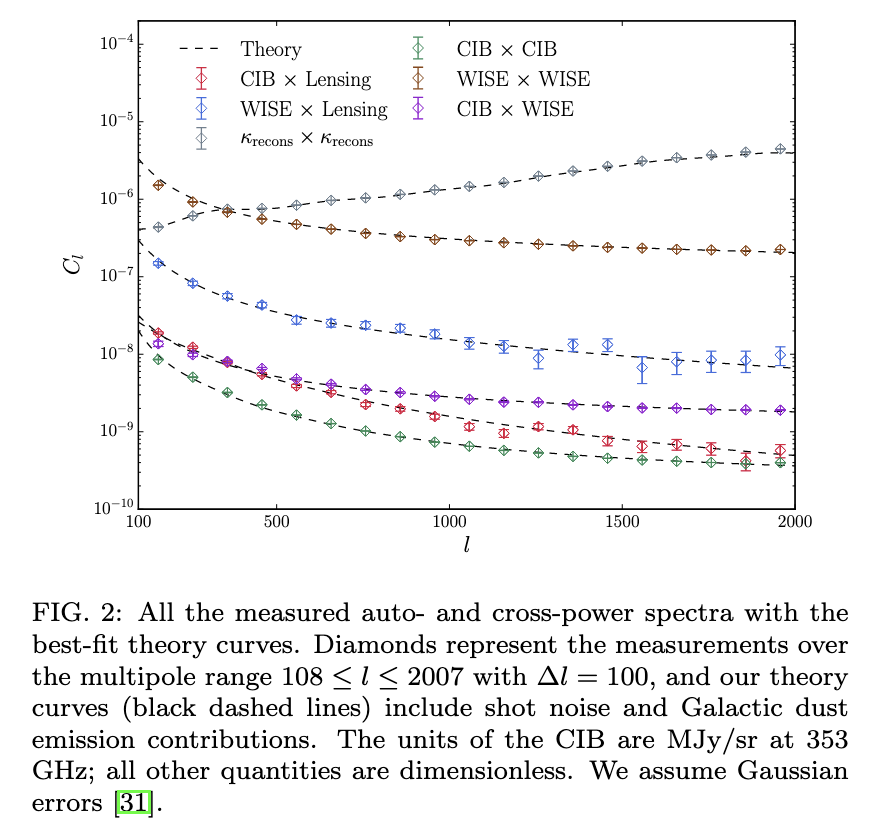

In [5]:
from IPython.display import Image
Image(filename='plot_from_yu_paper.png', width=400) 

In [6]:
def find_nearest(xout,xin,yin):
    idx = (numpy.abs(xin-xout)).argmin()
    return yin[idx]

mode = 'plotting' # 'plotting' or 'statistics'

if mode=='plotting':
    n_realisations = 10
elif mode=='statistics':
    n_realisations = 5000

filedir = 'filesForAntonFinal/'
mat = numpy.loadtxt(filedir+'simderiv_del_CBB_del_Cphiphi_theo.dat')
lmatA = numpy.loadtxt(filedir+'simderiv_del_CBB_del_Cphiphi_theo.dat_lvec')

In [21]:
X = numpy.loadtxt(filedir+'planckFINAL_lensedCls.dat')
Y = numpy.loadtxt(filedir+'planckFINAL_scalCls.dat')
Z = numpy.loadtxt(filedir+'planckFINALTensors_tensCls.dat')

TCMB = 2.726e6

lr = Z[:,0]
lsqClOver2piBBr = Z[:,3]
clBBr = lsqClOver2piBBr*(2*numpy.pi)/(lr*(lr+1.0))
clBBr /= TCMB**2
ll = X[:,0]
l = ll
lsqClOver2piBB = X[:,3]
lyy = Y[:,0]
clkap = Y[:,4]/(4.*TCMB**2)
clphi = clkap/lyy**(4.)*4.
phiBin = numpy.interp(lmatA,lyy,clphi)

multitracer_weights = numpy.load('matrix_of_tracer_weights.npy') #First index refers to tracer, second to multipole
cg = numpy.interp(lmatA,numpy.arange(3001),multitracer_weights[0])
cI = numpy.interp(lmatA,numpy.arange(3001),multitracer_weights[1])
cK = numpy.interp(lmatA,numpy.arange(3001),multitracer_weights[2])

# Interp to lmat ells
clkk_interp = np.interp(lmatA, cl_len.ls, clkk)
clII_interp = np.interp(lmatA, cl_len.ls, clII)
clgg_interp = np.interp(lmatA, cl_len.ls, clgg)
clIg_interp = np.interp(lmatA, cl_len.ls, clIg)
clkI_interp = np.interp(lmatA, cl_len.ls, clkI)
clkg_interp = np.interp(lmatA, cl_len.ls, clkg)
clIg_interp = np.interp(lmatA, cl_len.ls, clIg)
clkkrec_interp = np.interp(lmatA, cl_len.ls, clkkrec)

totalCross = cg*clkg_interp+cI*clkI_interp+cK*clkk_interp

fsky_BB = 0.05
fsky_LAT = 0.4

bandwidth = 1. #FIXME

# Multi-tracer delensing

### Old version (pre-7/21) with Planck errors

/Users/antonbaleatolizancos/opt/anaconda3/envs/lensing_py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/antonbaleatolizancos/opt/anaconda3/envs/lensing_py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


these are the ells
[0.000e+00 1.000e+00 2.000e+00 ... 5.248e+03 5.249e+03 5.250e+03]


<Figure size 343.113x296.878 with 0 Axes>

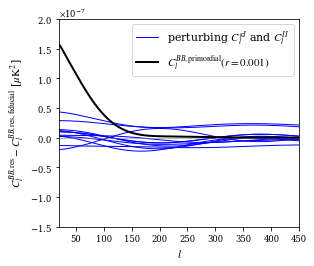

In [22]:
errorRatio = pickle.load(open(filedir+'errorRatioPlanck.pkl'))

multiCorrection = numpy.nan_to_num(cI/totalCross*clkI_interp)
multiCorrectionKg = numpy.nan_to_num(cg/totalCross*clkg_interp)

intEr =lmatA.copy()
intEr2 =lmatA.copy()

# Added by Anton. Initialise b-type errors
b_intEr =lmatA.copy()
b_intEr2 =lmatA.copy()

# Replace the CIB correlation with the correlation of the co-added tracer. We use the approximation that C^{\kappa I^{tot}} \approx C^{I^{tot} I^{tot}}
rho = np.sqrt(totalCross/clkk_interp)#pickle.load(open(filedir+'corr545FINAL.pkl'))
lowF = np.ones(rho.shape)
lowF[lmatA<60.] = 0.
rho *= lowF
rhoAlt = rho.copy()

# Change the fiducial delensed power as well (from CIB only to co-added)
clBBAD545 = numpy.dot((mat),(1.- rho**2.)*phiBin/TCMB**2.)#numpy.dot((mat),(1.-numpy.interp(lmatA,rho[0],lowF*rho[1]**2.))*phiBin/TCMB**2.)

plt.clf()
fig = plt.figure()
axes = plt.Axes(fig,[.15,.17,.7,.7])
fig.add_axes(axes)
axes.yaxis.set_major_formatter(formatter)

for i in xrange(n_realisations):
    # Right now, all measurements have the same error (from Planck)
    errReals = numpy.random.randn(len(errorRatio[0]))*errorRatio[1]
    errReals2 = numpy.random.randn(len(errorRatio[0]))*errorRatio[1]
    errReals3 = numpy.random.randn(len(errorRatio[0]))*errorRatio[1]
    errReals4 = numpy.random.randn(len(errorRatio[0]))*errorRatio[1]

    for j in xrange(len(lmatA)):
        intEr[j] = find_nearest(lmatA[j],errorRatio[0],errReals)
        intEr2[j] = find_nearest(lmatA[j],errorRatio[0],errReals2)

        b_intEr[j] = find_nearest(lmatA[j],errorRatio[0],errReals3)
        b_intEr2[j] = find_nearest(lmatA[j],errorRatio[0],errReals4)

    intEr[lmatA>1500.] = 0.;intEr2[lmatA>1500.] = 0.;b_intEr[lmatA>1500.] = 0.;b_intEr2[lmatA>1500.] = 0.;
    # Changed this line
    clBBADRand = numpy.dot(mat,(1.-rhoAlt**2. *(1.+multiCorrection*(intEr*2.-b_intEr)+multiCorrectionKg*(intEr2*2.-b_intEr2)))*phiBin/TCMB**2.)
    
    if mode == 'plotting':
        plt.plot(lmatA,TCMB**2 *(clBBADRand-clBBAD545),color='b', lw=1)
    elif mode=='statistics':
        np.save('fixed_residuals_after_delensing_for_propagating_to_r_bias/alltracers_residual_spec_'+str(i)+'_in_uK', TCMB**2 *(clBBADRand-clBBAD545))
        
if mode == 'plotting':
    # ANTON: edit legend to clarify that we're varying both auto- and cross- spectra
    plt.plot(lmatA,TCMB**2 * (clBBADRand-clBBAD545),label=r'perturbing $C_l^{\kappa I}$ and $C_l^{II}$',color='b', lw=1)
    # ANTON: plot x=0 line
    plt.axhline(0, lw=0.5, color='gray')

    plt.plot(lr,TCMB**2 * clBBr*0.001,label=r'$C_l^{BB,\mathrm{primordial}}(r=0.001)$',linewidth=2,color='k')
    plt.legend(loc='best')
    plt.ylim((-1.5e-7,2e-7))#plt.ylim(-1.5e-8,3.e-8)#
    plt.xlim(20,450)
    plt.ylabel(r'$C_l^{BB,\mathrm{res}}-C_l^{BB,\mathrm{res},\mathrm{fiducial}}$ [$\mu\mathrm{K}^2$]')
    plt.xlabel(r'$l$')

### New version with a-type errors drawn from covariance matrix

/Users/antonbaleatolizancos/opt/anaconda3/envs/lensing_py2/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in divide
/Users/antonbaleatolizancos/opt/anaconda3/envs/lensing_py2/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in divide


<Figure size 343.113x296.878 with 0 Axes>

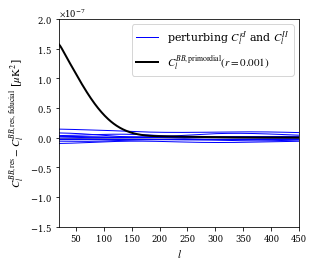

In [22]:
# Replace the CIB correlation with the correlation of the co-added tracer. We use the approximation that C^{\kappa I^{tot}} \approx C^{I^{tot} I^{tot}}
rho = np.sqrt(totalCross/clkk_interp) # An identity that's explained in the paper
lowF = np.ones(rho.shape); lowF[lmatA<60.] = 0.
rho *= lowF
rhoAlt = rho.copy()

# Calculate fiducial delensed power, appropriate for multi-tracer delnsing
clBBAD545 = numpy.dot(mat,(1.- rho**2.)*phiBin/TCMB**2.)

plt.clf()
fig = plt.figure()
axes = plt.Axes(fig,[.15,.17,.7,.7])
fig.add_axes(axes)
axes.yaxis.set_major_formatter(formatter)

for i in xrange(n_realisations):
    stdev_clkappaCIB_clkappaCIB = np.sqrt(( clkkrec*clII +  clkI**2 )/(2*cl_len.ls+1)/fsky_LAT/bandwidth )
    stdev_clkappaLSST_clkappaLSST = np.sqrt(1./(2*cl_len.ls+1)/fsky_LAT/bandwidth * ( clkkrec*clgg +  clkg**2 ) )

    # Generate zero-mean, Gaussian random perturbations at each ell with the standard dev given above
    errors_clkappaCIB_clkappaCIB = np.random.normal(loc=0, scale=stdev_clkappaCIB_clkappaCIB,\
                                                    size=stdev_clkappaCIB_clkappaCIB.shape)
    errors_clkappaLSST_clkappaLSST = np.random.normal(loc=0, scale=stdev_clkappaLSST_clkappaLSST,\
                                                    size=stdev_clkappaLSST_clkappaLSST.shape)

    pert_cross_spec_cib = np.nan_to_num(np.interp(lmatA, cl_len.ls, errors_clkappaCIB_clkappaCIB) / totalCross)
    pert_cross_spec_gal = np.nan_to_num(np.interp(lmatA, cl_len.ls, errors_clkappaLSST_clkappaLSST) / totalCross)

    pert_cross_spec_cib[lmatA>1500.] = 0.
    pert_cross_spec_gal[lmatA>1500.] = 0.

    # Changed this line
    clBBADRand = numpy.dot(mat, ( 1. - rhoAlt**2. * ( 1. + cI*pert_cross_spec_cib*2.\
                                                         + cg*pert_cross_spec_gal*2.) ) * phiBin/TCMB**2.)
    
    if mode == 'plotting':
        plt.plot(lmatA,TCMB**2 *(clBBADRand-clBBAD545),color='b', lw=1)
    elif mode=='statistics':
        np.save('fixed_residuals_after_delensing_for_propagating_to_r_bias/alltracers_residual_spec_'+str(i)+'_in_uK', TCMB**2 *(clBBADRand-clBBAD545))
        
if mode == 'plotting':
    # Edit legend to clarify that we're varying both auto- and cross- spectra
    plt.plot(lmatA,TCMB**2 * (clBBADRand-clBBAD545),label=r'perturbing $C_l^{\kappa I}$ and $C_l^{II}$',color='b', lw=1)
    # Plot x=0 line
    plt.axhline(0, lw=0.5, color='gray')

    plt.plot(lr,TCMB**2 * clBBr*0.001,label=r'$C_l^{BB,\mathrm{primordial}}(r=0.001)$',linewidth=2,color='k')
    plt.legend(loc='best')
    plt.ylim((-1.5e-7,2e-7))#plt.ylim(-1.5e-8,3.e-8)#
    plt.xlim(20,450)
    plt.ylabel(r'$C_l^{BB,\mathrm{res}}-C_l^{BB,\mathrm{res},\mathrm{fiducial}}$ [$\mu\mathrm{K}^2$]')
    plt.xlabel(r'$l$')

### New version with a- and b-type errors drawn from covariance matrix

/Users/antonbaleatolizancos/opt/anaconda3/envs/lensing_py2/lib/python2.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in divide
/Users/antonbaleatolizancos/opt/anaconda3/envs/lensing_py2/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in divide


<Figure size 343.113x296.878 with 0 Axes>

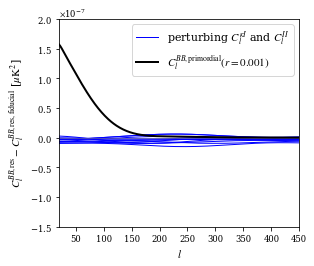

In [26]:
# The correlation coefficient of the co-added tracer
rho = np.sqrt(totalCross/clkk_interp) # An identity that's explained in the paper
lowF = np.ones(rho.shape); lowF[lmatA<60.] = 0.
rho *= lowF
rhoAlt = rho.copy()

# Calculate fiducial delensed power, appropriate for multi-tracer delnsing
clBBAD545 = numpy.dot(mat,(1.- rho**2.)*phiBin/TCMB**2.)

plt.clf()
fig = plt.figure()
axes = plt.Axes(fig,[.15,.17,.7,.7])
fig.add_axes(axes)
axes.yaxis.set_major_formatter(formatter)

for i in xrange(n_realisations):
    # Initialise matrix for the standard deviation of bandpower errors. We consider the case of three tracers
    n_tracers = 3
    error_stdevmat = np.zeros((n_tracers, n_tracers, len(lmatA)))

    # Assume no error in the internal reconstruction
    error_stdevmat[0,0,:] = 0
    # Error in C_l^{\kappa CIB}
    error_stdevmat[0,1,:] = error_stdevmat[1,0,:] = np.random.normal(loc=0, \
                                                                     scale=np.sqrt( (clkkrec_interp*clII_interp + clkI_interp**2 )/(2*lmatA+1)/fsky_LAT/bandwidth ),\
                                                                     size=len(lmatA))
    # Error in C_l^{\kappa gal}
    error_stdevmat[0,2,:] = error_stdevmat[2,0,:] = np.random.normal(loc=0, \
                                                                     scale=np.sqrt( (clkkrec_interp*clgg_interp + clkg_interp**2 )/(2*lmatA+1)/fsky_LAT/bandwidth ),\
                                                                     size=len(lmatA))
    # Error in C_l^{CIB CIB}
    error_stdevmat[1,1,:] = error_stdevmat[1,1,:] = np.random.normal(loc=0, \
                                                                     scale=np.sqrt( ( 2*clII_interp**2 )/(2*lmatA+1)/fsky_BB/bandwidth ),\
                                                                     size=len(lmatA))
    # Error in C_l^{gal gal}
    error_stdevmat[2,2,:] = error_stdevmat[2,2,:] = np.random.normal(loc=0, \
                                                                     scale=np.sqrt( ( 2*clgg_interp**2 )/(2*lmatA+1)/fsky_BB/bandwidth ),\
                                                                     size=len(lmatA))
    # Error in C_l^{CIB gal}
    error_stdevmat[1,2,:] = error_stdevmat[2,1,:] = np.random.normal(loc=0, \
                                                                     scale=np.sqrt( (clgg_interp*clII_interp + clIg_interp**2 )/(2*lmatA+1)/fsky_BB/bandwidth ),\
                                                                     size=len(lmatA))

    # Perform \sum_{i}c^{i}\Delta C^{\kappa I^{i}}
    multitracer_weights_array = np.array([cK, cI, cg])
    pert_a_type = np.einsum('ij,ij->j', error_stdevmat[0,:,:], np.nan_to_num(multitracer_weights_array/totalCross) )
    pert_a_type[lmatA>1500.] = 0.

    # Perform \sum_{ij}c^{i}c^{j}\Delta C^{I^{i}I^{j}}
    first_sum = np.einsum('ijk,jk->ik', error_stdevmat, np.nan_to_num(multitracer_weights_array/totalCross))
    pert_b_type = np.einsum('ij,ij->j', first_sum, multitracer_weights_array)
    pert_b_type[lmatA>1500.] = 0.

    # Changed this line
    clBBADRand = numpy.dot(mat, ( 1. - rhoAlt**2. * ( 1. + 2.*pert_a_type + pert_b_type) ) * phiBin/TCMB**2.)
    
    if mode == 'plotting':
        plt.plot(lmatA,TCMB**2 *(clBBADRand-clBBAD545),color='b', lw=1)
    elif mode=='statistics':
        np.save('fixed_residuals_after_delensing_for_propagating_to_r_bias/alltracers_residual_spec_'+str(i)+'_in_uK', TCMB**2 *(clBBADRand-clBBAD545))
        
if mode == 'plotting':
    # Edit legend to clarify that we're varying both auto- and cross- spectra
    plt.plot(lmatA,TCMB**2 * (clBBADRand-clBBAD545),label=r'perturbing $C_l^{\kappa I}$ and $C_l^{II}$',color='b', lw=1)
    # Plot x=0 line
    plt.axhline(0, lw=0.5, color='gray')

    plt.plot(lr,TCMB**2 * clBBr*0.001,label=r'$C_l^{BB,\mathrm{primordial}}(r=0.001)$',linewidth=2,color='k')
    plt.legend(loc='best')
    plt.ylim((-1.5e-7,2e-7))#plt.ylim(-1.5e-8,3.e-8)#
    plt.xlim(20,450)
    plt.ylabel(r'$C_l^{BB,\mathrm{res}}-C_l^{BB,\mathrm{res},\mathrm{fiducial}}$ [$\mu\mathrm{K}^2$]')
    plt.xlabel(r'$l$')

# Delensing with only the CIB

### With a-type errors only

<Figure size 343.113x296.878 with 0 Axes>

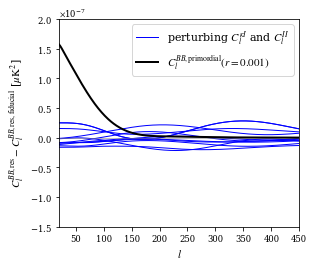

In [24]:
# Load in and high-pass filter the correlation coefficient
rho = pickle.load(open(filedir+'corr545FINAL.pkl'))
lowF = rho[0]*0.+1.; lowF[rho[0]<60.] = 0.
rho[1] *= lowF
rhoAlt = rho[1].copy()

# Compute fiducial delensed B-mode power spectrum
clBBAD545 = numpy.dot((mat),(1.-numpy.interp(lmatA,rho[0],lowF*rho[1]**2.))*phiBin/TCMB**2.)

plt.clf()
fig = plt.figure()
axes = plt.Axes(fig,[.15,.17,.7,.7])
fig.add_axes(axes)
axes.yaxis.set_major_formatter(formatter)

for i in xrange(n_realisations):
    # Calculate the covariance of the relevant spectrum errors
    stdev_clkappaCIB_clkappaCIB = np.sqrt(( clkkrec*clII +  clkI**2 )/(2*cl_len.ls+1)/fsky_LAT/bandwidth )

    # Generate zero-mean, Gaussian random perturbations of the cross-spectrum at each ell with the
    # standard dev given above
    errors_clkappaCIB_clkappaCIB = np.random.normal(loc=0, scale=stdev_clkappaCIB_clkappaCIB,\
                                                    size=stdev_clkappaCIB_clkappaCIB.shape)
    pert_cross_spec = np.interp(lmatA, cl_len.ls, errors_clkappaCIB_clkappaCIB/clkI)
    pert_cross_spec[lmatA>1500.] = 0.
    
    # Compute perturbed delensed B-mode PS
    clBBADRand = numpy.dot(mat,(1.-numpy.interp(lmatA,rho[0],rhoAlt**2.) *(1.+(pert_cross_spec*2.)))*phiBin/TCMB**2.)
    if mode == 'plotting':
        # Plot residual spectrum (perturbed minus fiducial)
        plt.plot(lmatA,TCMB**2 *(clBBADRand-clBBAD545),color='b', lw=1)
    elif mode == 'statistics':
        np.save('residuals_after_delensing_for_propagating_to_r_bias/cibonly_residual_spec_'+str(i)+'_in_uK', TCMB**2 *(clBBADRand-clBBAD545))


if mode == 'plotting':
    # Edit legend to clarify that we're varying both auto- and cross- spectra
    plt.plot(lmatA, TCMB**2 * (clBBADRand-clBBAD545),label=r'perturbing $C_l^{\kappa I}$ and $C_l^{II}$',color='b', lw=1)
    # Plot x=0 line
    plt.axhline(0, lw=0.5, color='gray')

    # Plot tensor B-mode
    plt.plot(lr,TCMB**2 * clBBr*0.001,label=r'$C_l^{BB,\mathrm{primordial}}(r=0.001)$',linewidth=2,color='k')
    plt.legend(loc='best')

    plt.ylim((-1.5e-7,2e-7))#plt.ylim(-1.5e-8,3.e-8)#
    plt.xlim(20,450)
    plt.ylabel(r'$C_l^{BB,\mathrm{res}}-C_l^{BB,\mathrm{res},\mathrm{fiducial}}$ [$\mu\mathrm{K}^2$]')
    plt.xlabel(r'$l$')


### With both a- and b-type errors

<Figure size 343.113x296.878 with 0 Axes>

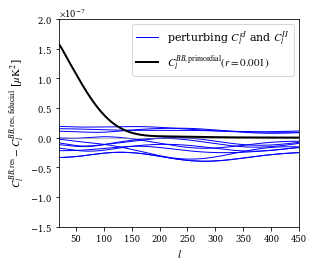

In [25]:
# Load in and high-pass filter the correlation coefficient
rho = pickle.load(open(filedir+'corr545FINAL.pkl'))
lowF = rho[0]*0.+1.; lowF[rho[0]<60.] = 0.
rho[1] *= lowF
rhoAlt = rho[1].copy()

# Compute fiducial delensed B-mode power spectrum
clBBAD545 = numpy.dot((mat),(1.-numpy.interp(lmatA,rho[0],lowF*rho[1]**2.))*phiBin/TCMB**2.)

plt.clf()
fig = plt.figure()
axes = plt.Axes(fig,[.15,.17,.7,.7])
fig.add_axes(axes)
axes.yaxis.set_major_formatter(formatter)

for i in xrange(n_realisations):
    # Calculate the covariance of the relevant spectrum errors
    stdev_clkappaCIB_clkappaCIB = np.sqrt(( clkkrec*clII +  clkI**2 )/(2*cl_len.ls+1)/fsky_LAT/bandwidth )
    stdev_CIB_auto = np.sqrt(( 2*clII**2 )/(2*cl_len.ls+1)/fsky_BB/bandwidth )

    # Generate zero-mean, Gaussian random perturbations of the cross-spectrum at each ell with the
    # standard dev given above
    errors_clkappaCIB_clkappaCIB = np.random.normal(loc=0, scale=stdev_clkappaCIB_clkappaCIB,\
                                                    size=stdev_clkappaCIB_clkappaCIB.shape)
    errors_clCIBCIB_clCIBCIB = np.random.normal(loc=0, scale=stdev_CIB_auto,\
                                                    size=stdev_CIB_auto.shape)
    pert_cross_spec = np.interp(lmatA, cl_len.ls, errors_clkappaCIB_clkappaCIB/clkI)
    pert_cross_spec[lmatA>1500.] = 0.

    pert_auto_spec = np.interp(lmatA, cl_len.ls, errors_clCIBCIB_clCIBCIB/clII)
    pert_auto_spec[lmatA>1500.] = 0.
    
    # Compute perturbed delensed B-mode PS
    clBBADRand = numpy.dot(mat,(1.-numpy.interp(lmatA,rho[0],rhoAlt**2.) *\
                                   (1. + pert_cross_spec*2. - pert_auto_spec))*phiBin/TCMB**2.)
    if mode == 'plotting':
        # Plot residual spectrum (perturbed minus fiducial)
        plt.plot(lmatA,TCMB**2 *(clBBADRand-clBBAD545),color='b', lw=1)
    elif mode == 'statistics':
        np.save('residuals_after_delensing_for_propagating_to_r_bias/cibonly_residual_spec_'+str(i)+'_in_uK', TCMB**2 *(clBBADRand-clBBAD545))

if mode == 'plotting':
    # Edit legend to clarify that we're varying both auto- and cross- spectra
    plt.plot(lmatA, TCMB**2 * (clBBADRand-clBBAD545),label=r'perturbing $C_l^{\kappa I}$ and $C_l^{II}$',color='b', lw=1)
    # Plot x=0 line
    plt.axhline(0, lw=0.5, color='gray')

    # Plot tensor B-mode
    plt.plot(lr,TCMB**2 * clBBr*0.001,label=r'$C_l^{BB,\mathrm{primordial}}(r=0.001)$',linewidth=2,color='k')
    plt.legend(loc='best')

    plt.ylim((-1.5e-7,2e-7))#plt.ylim(-1.5e-8,3.e-8)#
    plt.xlim(20,450)
    plt.ylabel(r'$C_l^{BB,\mathrm{res}}-C_l^{BB,\mathrm{res},\mathrm{fiducial}}$ [$\mu\mathrm{K}^2$]')
    plt.xlabel(r'$l$')
